# Project Title
### Data Engineering Capstone Project

#### Project Summary


In this project, more than one source of data will be used, and I will also work on discovering and cleaning data from different sources to improve the quality of the analysis to benefit from them.after that i will run ETL for my data .By analyzing the data,We can know the number of uses for the types of visa
What visa do they prefer to use? And We anticipate the right time to migrate

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import pandas as pd
import psycopg2
from sql_queries import I94_Immigration_insert, World_Temperature_insert, City_Demographic_insert, airport_codes_insert,visa_insert


### Step 1: Scope the Project and Gather Data

#### Scope 


The sources that will be worked on in this project, serve more when linked with each other to expand the circle of analysis and answer more questions of expectations and questions.

#### What data do you use?
i will use tha data that udacity provided 

1-I94 Immigration Data

2-World Temperature Data

3-U.S. City Demographic Data

4-airport-codes also 

#### What tools did you use?
python , Japtter notebooks And pyspark spark is a good for workong with the big data .

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

### I94 Immigration Data:
This data comes from the US National Tourism and Trade Office .
### World Temperature Data:
This dataset came from Kaggle.
### U.S. City Demographic Data:
This data comes from OpenSoft




##### The DATA

In [2]:
# Read in the data here

World_Temperature = 'data/GlobalLandTemperaturesByCity.csv'
df_World_Temperature = pd.read_csv(World_Temperature)

US_City_Demographic = 'data/us-cities-demographics.csv'
df_US_City_Demographi = pd.read_csv(US_City_Demographic , delimiter=";")

df_airport_codes_path = pd.read_csv("data/airport-codes_csv.csv")

visa = pd.read_csv("data/194Visa.csv")





/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### World Temperature Data

In [3]:
df_World_Temperature.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


##### U.S. City Demographic Data

In [4]:
df_US_City_Demographi.head(30)

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402
5,Peoria,Illinois,33.1,56229.0,62432.0,118661,6634.0,7517.0,2.40,IL,American Indian and Alaska Native,1343
6,Avondale,Arizona,29.1,38712.0,41971.0,80683,4815.0,8355.0,3.18,AZ,Black or African-American,11592
7,West Covina,California,39.8,51629.0,56860.0,108489,3800.0,37038.0,3.56,CA,Asian,32716
8,O'Fallon,Missouri,36.0,41762.0,43270.0,85032,5783.0,3269.0,2.77,MO,Hispanic or Latino,2583
9,High Point,North Carolina,35.5,51751.0,58077.0,109828,5204.0,16315.0,2.65,NC,Asian,11060


##### Airport_codesc Data

In [5]:
df_airport_codes_path.head(30)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
5,00AS,small_airport,Fulton Airport,1100.0,NaN,US,US-OK,Alex,00AS,NaN,00AS,"-97.8180194, 34.9428028"
6,00AZ,small_airport,Cordes Airport,3810.0,NaN,US,US-AZ,Cordes,00AZ,NaN,00AZ,"-112.16500091552734, 34.305599212646484"
7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,US-CA,Barstow,00CA,NaN,00CA,"-116.888000488, 35.350498199499995"
8,00CL,small_airport,Williams Ag Airport,87.0,NaN,US,US-CA,Biggs,00CL,NaN,00CL,"-121.763427, 39.427188"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,US-CA,Pine Valley,00CN,NaN,00CN,"-116.4597417, 32.7273736"


In [6]:
visa.head(5)

,i94visa,categories
0,1,Business
1,2,Pleasure
2,3,Student


In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
enableHiveSupport().getOrCreate()

df_spark = spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')
df_spark=spark.read.parquet("sas_data")
df_spark.head(4)

[Row(cicid=5748517.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='CA', depdate=20582.0, i94bir=40.0, i94visa=1.0, count=1.0, dtadfile='20160430', visapost='SYD', occup=None, entdepa='G', entdepd='O', entdepu=None, matflag='M', biryear=1976.0, dtaddto='10292016', gender='F', insnum=None, airline='QF', admnum=94953870030.0, fltno='00011', visatype='B1'),
 Row(cicid=5748518.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='NV', depdate=20591.0, i94bir=32.0, i94visa=1.0, count=1.0, dtadfile='20160430', visapost='SYD', occup=None, entdepa='G', entdepd='O', entdepu=None, matflag='M', biryear=1984.0, dtaddto='10292016', gender='F', insnum=None, airline='VA', admnum=94955622830.0, fltno='00007', visatype='B1'),
 Row(cicid=5748519.0, i94yr=2016.0, i94mon=4.0, i94cit=245.0, i94res=438.0, i94port='LOS', arrdate=20574.0, i94mode=1.0, i94addr='WA', depdate=20582.0, i94bir=29.

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.


##### Explore the I94 Immigration Data

In [11]:
df_spark.describe()

DataFrame[summary: string, cicid: string, i94yr: string, i94mon: string, i94cit: string, i94res: string, i94port: string, arrdate: string, i94mode: string, i94addr: string, depdate: string, i94bir: string, i94visa: string, count: string, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: string, dtaddto: string, gender: string, insnum: string, airline: string, admnum: string, fltno: string, visatype: string]

##### Explore the World Temperature Data

In [8]:
df_World_Temperature.describe()

,AverageTemperature
count,8.251669e+06
mean,1.673311e+01
std,1.035019e+01
min,-4.270400e+01
25%,1.030800e+01
50%,1.883800e+01
75%,2.521400e+01
max,3.965100e+01


##### Find if there missing value

In [9]:
df_World_Temperature.isna().sum()

dt                                    0
AverageTemperature               364701
AverageTemperatureUncertainty    364701
City                                  0
Country                               0
Latitude                              0
Longitude                             1
dtype: int64

##### Explore the U.S. City Demographic Data

In [10]:
df_US_City_Demographi.describe()

,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count
count,2891.000000,2.888000e+03,2.888000e+03,2.891000e+03,2878.000000,2.878000e+03,2875.000000,2.891000e+03
mean,35.494881,9.732843e+04,1.017696e+05,1.989668e+05,9367.832523,4.065360e+04,2.742543,4.896377e+04
std,4.401617,2.162999e+05,2.315646e+05,4.475559e+05,13211.219924,1.557491e+05,0.433291,1.443856e+05
min,22.900000,2.928100e+04,2.734800e+04,6.321500e+04,416.000000,8.610000e+02,2.000000,9.800000e+01
25%,32.800000,3.928900e+04,4.122700e+04,8.042900e+04,3739.000000,9.224000e+03,2.430000,3.435000e+03
50%,35.300000,5.234100e+04,5.380900e+04,1.067820e+05,5397.000000,1.882200e+04,2.650000,1.378000e+04
75%,38.000000,8.664175e+04,8.960400e+04,1.752320e+05,9368.000000,3.397175e+04,2.950000,5.444700e+04
max,70.500000,4.081698e+06,4.468707e+06,8.550405e+06,156961.000000,3.212500e+06,4.980000,3.835726e+06


##### Find if there missing value

In [11]:
df_US_City_Demographi.isna().sum()

City                       0
State                      0
Median Age                 0
Male Population            3
Female Population          3
Total Population           0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
State Code                 0
Race                       0
Count                      0
dtype: int64

##### Explore the airport_codes Data

In [12]:
df_airport_codes_path.describe()

,elevation_ft
count,48069.000000
mean,1240.789677
std,1602.363459
min,-1266.000000
25%,205.000000
50%,718.000000
75%,1497.000000
max,22000.000000


##### Find if there missing value

In [13]:
df_airport_codes_path.isna().sum()

ident               0
type                0
name                0
elevation_ft     7006
continent       27719
iso_country       247
iso_region          0
municipality     5676
gps_code        14045
iata_code       45886
local_code      26389
coordinates         0
dtype: int64

#### Cleaning Steps
Document steps necessary to clean the data

#### Remove the null Value in World_Temperature data
###### i remove the mising value in the world tempreature data only becouse tha mising data will not healp to get infomathin 

In [15]:
# Performing cleaning tasks here
def clean_data(table):
    table_to_clean=table.dropna()
    return table_to_clean

After_dellNull_World_Temperature=clean_data(df_World_Temperature)
After_dellNull_World_Temperature.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

##### rename some columns , some columns have space and the dosent work when i go to insert the data so i change the columns name 

In [16]:
def rename(df,old,new):
    df.rename(
    columns={old:new}
    ,inplace=True)
    return df 


In [ ]:
df_I94_Immigration_path=rename(df_spark,'i94yr' ,'Year')
df_I94_Immigration_path=rename(df_spark,'i94mon' ,'Month')


In [17]:
df_US_City_Demographi.rename(columns = {'Median Age':'Median_Age', 'Male Population':'Male_population', 'Female Population':'Female_population', 'Total Population':'Total_population', 'Number of Veterans':'Number_Veterans', 'Foreign-born':'Foreign_Born', 'Average Household Size':'Average_Household_Size','State Code':'State_Code'}, inplace = True)
df_US_City_Demographi.head(1)

,City,State,Median_Age,Male_population,Female_population,Total_population,Number_Veterans,Foreign_Born,Average_Household_Size,State_Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.6,MD,Hispanic or Latino,25924


### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model



###### I used the Fact and Dimension table to be able to analyze more broadly about linking them to each other, for example, I can inquire about the number of visa types according to business or personal by linking a 194_immigration tabl with the visa table

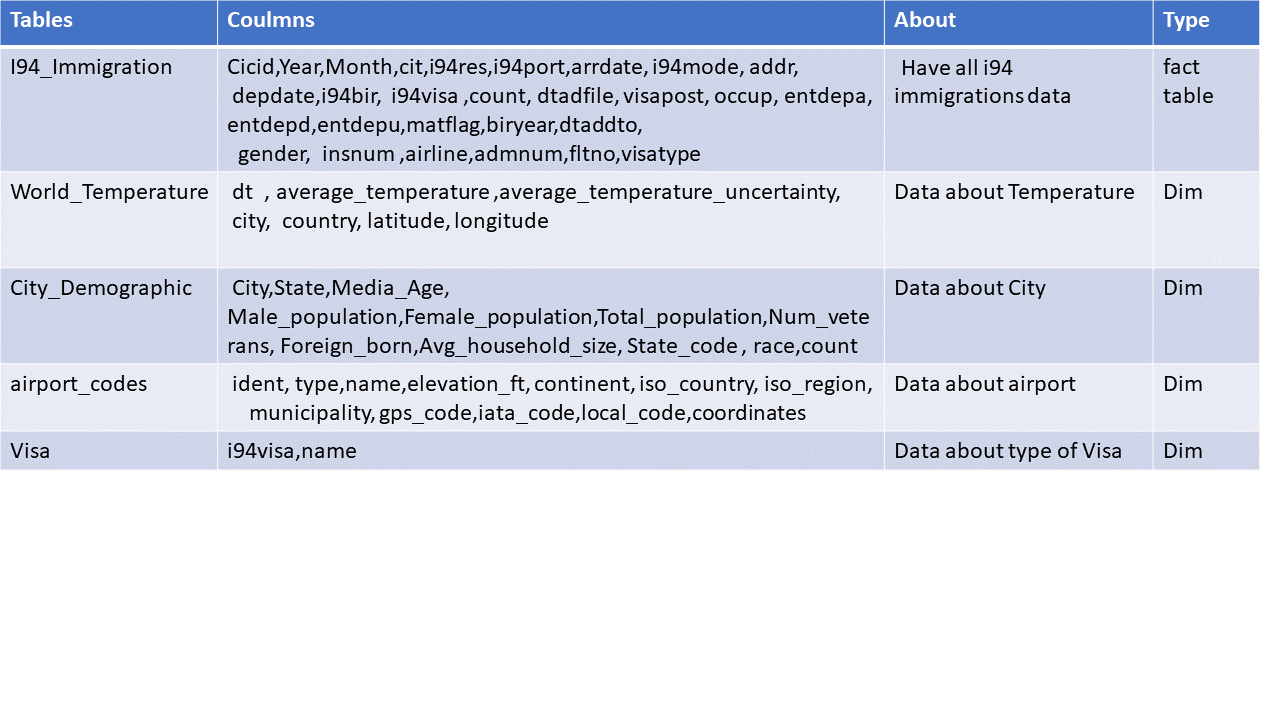

In [22]:
from IPython import display
display.Image("data/Data Model.png")

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

##### First i crete tables in database in another file to insert the data into the tables ,then i run the file and create the database the next steep make loding the data 

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [18]:
# Write code here
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [17]:
curs = conn.cursor()
curs.execute("ROLLBACK")
conn.commit()

#### The last steep in ETL is Lodind the data 

###### Loding the data into tables that i was creted

In [19]:
Convert_panda=df_spark.toPandas()

Py4JJavaError: An error occurred while calling o50.collectToPython.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:282)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.next(SparkPlan.scala:278)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.sql.execution.SparkPlan$$anon$1.foreach(SparkPlan.scala:278)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeCollect$1.apply(SparkPlan.scala:300)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeCollect$1.apply(SparkPlan.scala:299)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:186)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3257)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3254)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3364)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3363)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
for index, row in Convert_panda():
    cur.execute("INSERT INTO I94_Immigration VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);",\
                 ([row.cicid,row.i94yr,row.i94mon,row.i94cit ,row.i94res,row.i94port,row.arrdate,row.i94mode,row.i94addr ,row.depdate ,row.i94bir,\
                   row.i94visa ,row['count'],row.dtadfile,row.visapost ,row.occup,row.entdepa,row.entdepd ,row.entdepu ,row.matflag ,\
                   row.biryear ,row.dtaddto,row.gender,row.insnum ,row.airline,row.admnum ,row.fltno ,row.visatype]))
conn.commit()


In [24]:
for index, row in After_dellNull_World_Temperature.iterrows():
     cur.execute("INSERT INTO World_Temperature VALUES(%s, %s, %s, %s, %s, %s, %s);", ([row['dt'],row.AverageTemperature,row.AverageTemperatureUncertainty,row.City,row.Country,row.Latitude,row.Longitude]))
conn.commit()

for index, row in df_US_City_Demographi.iterrows():
     cur.execute("INSERT INTO City_Demographic VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);", ([row.City, row.State, row.Median_Age ,row.Male_population,row.Female_population,row.Total_population,row.Number_Veterans,row.Foreign_Born,row.Average_Household_Size,row.State_Code,row.Race,row.Count]))
conn.commit()


for index, row in df_airport_codes_path.iterrows():
     cur.execute("INSERT INTO airport_codes VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);", ([row.ident, row.type, row.name ,row.elevation_ft,row.continent,row.iso_country,row.iso_region,row.municipality,row.gps_code,row.iata_code,row.local_code,row.coordinates]))
conn.commit()

for index, row in df_I94_Immigration_path.iterrows():
    cur.execute("INSERT INTO I94_Immigration VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);",\
                 ([row.cicid,row.Year,row.Month,row.i94cit ,row.i94res,row.i94port,row.arrdate,row.i94mode,row.i94addr ,row.depdate ,row.i94bir,\
                   row.i94visa ,row['count'],row.dtadfile,row.visapost ,row.occup,row.entdepa,row.entdepd ,row.entdepu ,row.matflag ,\
                   row.biryear ,row.dtaddto,row.gender,row.insnum ,row.airline,row.admnum ,row.fltno ,row.visatype]))
conn.commit()

for index, row in visa.iterrows():
     cur.execute("INSERT INTO Visa VALUES(%s, %s);", (row.i94visa,row.categories))
conn.commit()



#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected.
 
Run Quality Checks

#### Checks to Ensure that the relationship between the two tables is working correctly

 ## How many immigration instances used certain visa types?

In [ ]:
sql = "SELECT count(I94_Immigration.i94visa ) AS Number_of_Visi , Visa.name AS name FROM Visa JOIN I94_Immigration ON Visa.i94visa = I94_Immigration.i94visa group by Visa.name"

cur.execute(sql)

myresult = cur.fetchall()

for x in myresult:
    print(x)

#### Checks about the tables have data 

In [ ]:
cur.execute("SELECT COUNT(*) FROM Visa")
conn.commit()
if cur.rowcount > 0:
    print("HAVE DATA")
    
cur.execute("SELECT COUNT(*) FROM City_Demographic")
conn.commit()
if cur.rowcount > 0:
    print("HAVE DATA")
    
cur.execute("SELECT COUNT(*) FROM airport_codes")
conn.commit()
if cur.rowcount > 0:
    print("HAVE DATA")
    
cur.execute("SELECT COUNT(*) FROM World_Temperature")
conn.commit()
if cur.rowcount > 0:
    print("HAVE DATA")
    
cur.execute("SELECT COUNT(*) FROM I94_Immigration")
conn.commit()
if cur.rowcount > 0:
    print("HAVE DATA")

In [6]:
# Perform quality checks here

cur.execute("SELECT * FROM I94_Immigration limit 5 ")
result = cur.fetchall()
for row in result:
    print(row)
    print("\n")
    
    

In [28]:
cur.execute("SELECT * FROM World_Temperature limit 5")
result = cur.fetchall()
for row in result:
    print(row)
    print("\n")

(datetime.date(1743, 11, 1), 6.068, 1.737, 'Århus', 'Denmark', '57.05N', '10.33E')


(datetime.date(1744, 4, 1), 5.788, 3.624, 'Århus', 'Denmark', '57.05N', '10.33E')


(datetime.date(1744, 5, 1), 10.644, 1.283, 'Århus', 'Denmark', '57.05N', '10.33E')


(datetime.date(1744, 6, 1), 14.051, 1.347, 'Århus', 'Denmark', '57.05N', '10.33E')


(datetime.date(1744, 7, 1), 16.082, 1.396, 'Århus', 'Denmark', '57.05N', '10.33E')




In [29]:
cur.execute("SELECT * FROM City_Demographic limit 5 ")
result = cur.fetchall()
for row in result:
    print(row)
    print("\n")

('Silver Spring', 'Maryland', 33.8, '40601.0', '41862.0', '82463', '1562.0', '30908.0', 2.6, 'MD', 'Hispanic or Latino', 25924)


('Quincy', 'Massachusetts', 41.0, '44129.0', '49500.0', '93629', '4147.0', '32935.0', 2.39, 'MA', 'White', 58723)


('Hoover', 'Alabama', 38.5, '38040.0', '46799.0', '84839', '4819.0', '8229.0', 2.58, 'AL', 'Asian', 4759)


('Rancho Cucamonga', 'California', 34.5, '88127.0', '87105.0', '175232', '5821.0', '33878.0', 3.18, 'CA', 'Black or African-American', 24437)


('Newark', 'New Jersey', 34.6, '138040.0', '143873.0', '281913', '5829.0', '86253.0', 2.73, 'NJ', 'White', 76402)




In [30]:
cur.execute("SELECT * FROM airport_codes limit 5")
result = cur.fetchall()
for row in result:
    print(row)
    print("\n")

('00A', 'heliport', '0', 11.0, 'NaN', 'US', 'US-PA', 'Bensalem', '00A', 'NaN', '00A', '-74.93360137939453, 40.07080078125')


('00AA', 'small_airport', '1', 3435.0, 'NaN', 'US', 'US-KS', 'Leoti', '00AA', 'NaN', '00AA', '-101.473911, 38.704022')


('00AK', 'small_airport', '2', 450.0, 'NaN', 'US', 'US-AK', 'Anchor Point', '00AK', 'NaN', '00AK', '-151.695999146, 59.94919968')


('00AL', 'small_airport', '3', 820.0, 'NaN', 'US', 'US-AL', 'Harvest', '00AL', 'NaN', '00AL', '-86.77030181884766, 34.86479949951172')


('00AR', 'closed', '4', 237.0, 'NaN', 'US', 'US-AR', 'Newport', 'NaN', 'NaN', 'NaN', '-91.254898, 35.6087')




#### 4.3 Data dictionary 


#### I94_Immigration Table :
    COULOMN      TYPE                DESC
    cicid        FLOAT             PRIMARY KEY
    Year         FLOAT              4 digt year
    Month        FLOAT              numeric month
    i94cit       FLOAT              FK for country table 
    i94res       FLOAT              FK for country table 
    arrdate      FLOAT             arrive date in the US 
    i94mode      FLOAT             traffic method
    addr        VARCHAR             state of arrival
    depdate     FLOAT             leving date 
    i94bir      FLOAT             age
    i94visa     FLOAT            Fk for Visa table 
    gender      VARCHAR            sex (F & M)
    visatype    VARCHAR             type of visa 

#### World_Temperature Table
    COLUMNS                           TYPE       DESC
    dt                               date      about date
    average_temperature              FLOAT     info about the Avg of temperature
    average_temperature_uncertainty  FLOAT     info about the Avg of temperature uncertainty
    city                             VARCHAR    about city name 
    country                          VARCHAR    about country name 
    latitude                         VARCHAR
    longitude                        VARCHAR

#### City_Demographic table 
    COULMNS                TYPE            DEC
    City                   VARCHAR         city name 
    State                  VARCHAR         state name 
    Media_Age              FLOAT           cite of Media Age
    Male_population        VARCHAR         Male population
    Female_population      VARCHAR         Female population
    Total_population       VARCHAR
    Num_veterans           VARCHAR
    Foreign_born           VARCHAR         Foreign born baby
    Avg_household_size     FLOAT           city Avg houshold size 
    State_code             VARCHAR        tow char for satate
    race                   VARCHAR        race of majority
    count                  INT

#### Visa table 
     COULMNS    TYPE     DESC
     194visa    flot         PK
     categorice  VARCHAR        Type of the visa

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.


### Clearly state the rationale for the choice of tools and technologies for the project.

##### First I import pandas into the library to read, display, manipulate and clean the data I also called the psycopg2 library to help me connect to the databases ,I used Jupyter Notebook to display the data sources and see them in a clearer way to help me understand and deal with the data in terms of displaying, organizing and discovering them.I also used other files to write commands to create tables in the database to load data on

### Propose how often the data should be updated and why.

##### I suggest that the data be updated monthly to follow up the data significantly better than annually or daily to follow the change of factors during the months

### Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.

##### I recommend using the Spark because he is excellent with dealing with big data, and also Spark contains libraries for data analysis

### The data populates a dashboard that must be updated on a daily basis by 7am every day

##### In the previous project, I used the airflow and the creation of the DAG. We can update the DAG at any time we want. We will update it at 7 o’clock so that the dash board is updated every day at seven o’clock.

### The database needed to be accessed by 100+ people

##### in the RedShift we can store the data and make the many pepole access them by give authority 